Import the Essential Libraries for Our Tool

In [21]:
import mpmath as mpmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv  # import the modified first kind (iv) and second kind (kv) from scipy

We can define the step function to represent the equation below, but this is not necessarily for our goal since we are only working the approximation
$$\frac{\theta(\Omega - \Omega_{thr})}{\sqrt{\Omega-\Omega_{thr}}} f(\Omega)$$ 
Essentially, this function takes in two parameters and will return values as a piecewise function

$$\theta(\Omega - \Omega_{thr}) = \begin{cases} 
      1 & \Omega - \Omega_{thr} > 0 \\
      0 & \Omega - \Omega_{thr}\leq 0  
   \end{cases}$$


In [22]:
def theta(omega_cap, omega_cap_thr, f = lambda r,r_prime:  r - r_prime):
    return 1 if f(omega_cap,omega_cap_thr) > 0 else 0

Since our step functions only need to take in one variable for the approximation, let's define the function
$$\theta(\omega) = \begin{cases} 
      1 & \omega > 0 \\
      0 & \omega \leq 0  
   \end{cases}$$

In [23]:
def theta(omega):
    return 1 if omega > 0 else 0 


Here is the main part which we will define the smooth operator

$$\sqrt{\frac{\pi |\omega|}{8\gamma}} e^{\frac{-\omega^2}{4}}
    \left\{
    \theta (\omega) \left[ I_{-1/4}\left(\frac{\omega^2}{4}\right) + I_{1/4}\left(\frac{\omega^2}{4}\right)+ \frac{\sqrt{2}}{\pi}\theta (-\omega) K_{1/4}\left( \frac{\omega^2}{4} \right)
    \right]
    \right\} $$
Which will act on the smotth function $$f(\Omega_{thr})$$
to give a new value $$f^{'}(\Omega_{thr})$$

In [24]:
def smooth_operator(omega_cap_through, smooth_func, tau = 1): # the width of quasiparticle is at default 1, but we can change it
    #new_dict = {} # Creating a dictionary to store
    y_new = []
    i = 0
    x_values, y_values = list(smooth_func.keys()), list(smooth_func.values()) # unpack the values from the data
    for omega_cap in x_values:
        omega = (omega_cap-omega_cap_through)/tau # define the dimensionless parameter
        prop = np.sqrt((np.pi * abs(omega))/(8*tau)) \
               * np.exp(-(omega**2)/4)  # define the term outside of curly bracket
        i_terms = iv(-.25, (omega**2)/4) + iv(.25, (omega**2)/4) # define the addition of two firt kind of order 1/4 and -1/4
        k_terms = (np.sqrt(2)/np.pi)*theta(-omega)*kv(.25,(omega**2)/4) # define the term including second kind of order 1/4
        y_new.append(prop*(i_terms+k_terms)*y_values[i]) # add the new value to the list
        i+=1
    return y_new # return the list of new values 

This is great because we now have the transformed values. Let's plot them to see what happens. Our task is pretty done, but let me create a test function

In [25]:
sin_func = {x:np.sin(x) for x in np.linspace(0.0001, 10, 1000)}
print(sin_func)

{0.0001: 9.999999983333334e-05, 0.01010990990990991: 0.010109737688005662, 0.02011981981981982: 0.020118462406142755, 0.030129729729729732: 0.03012517130545236, 0.040139639639639645: 0.040128861739122154, 0.05014954954954955: 0.05012853136278239, 0.06015945945945947: 0.0601231782349383, 0.07016936936936938: 0.07011180091736201, 0.08017927927927929: 0.0800933985754342, 0.0901891891891892: 0.09006697107842512, 0.1001990990990991: 0.1000315190997052, 0.11020900900900901: 0.10998604421687497, 0.12021891891891894: 0.11992954901180454, 0.13022882882882883: 0.12986103717057226, 0.14023873873873874: 0.13977951358329294, 0.15024864864864865: 0.14968398444382527, 0.16025855855855856: 0.15957345734934875, 0.17026846846846846: 0.16944694139979974, 0.18027837837837837: 0.17930344729715741, 0.19028828828828828: 0.18914198744456867, 0.2002981981981982: 0.19896157604530296, 0.2103081081081081: 0.20876122920152648, 0.220318018018018: 0.21853996501288644, 0.23032792792792792: 0.22829680367489483, 0.2403

Let see how the our operator corrects the sin function, but we need to choose the width of quasiparticle and the point of correction. 

In [26]:
y_modified = smooth_operator(3.013082882882883, sin_func, .5)
lists = sorted(sin_func.items())
x_comp_2, y_comp_2 = zip(*lists)

/var/folders/py/321_f5qd08j580pct3tvllph0000gn/T/ipykernel_35460/1018476763.py:11: RuntimeWarning: invalid value encountered in double_scalars
  k_terms = (np.sqrt(2)/np.pi)*theta(-omega)*kv(.25,(omega**2)/4) # define the term including second kind of order 1/4


We now have all the values that we need. Let's plot them!

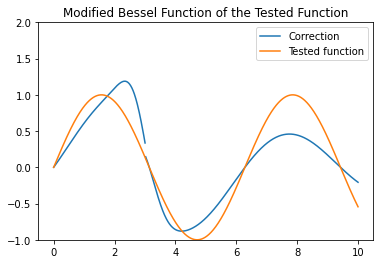

In [20]:
plt.plot(x_comp_2, y_modified, label = "Correction")
plt.plot(x_comp_2,y_comp_2, label = "Tested function")
plt.ylim(-1, 2)
plt.legend()
plt.title(r'Modified Bessel Function of the Tested Function')
plt.show()

One current problem is that at the point of correction, the function becomes discrete. 